#### Check the conditions on Roche Lobe

Average time span of interest for a single system

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import math 
import statistics
import matplotlib.pyplot as plt
import dask.dataframe as dd
import os
import seaborn as sns
import pylab as pl
from run_3rd.py import path

In [2]:
path = "Joined_data/"
df = pd.read_csv(path+"F_sevn_output_Z"+"0.01"+"A"+"0.5"+"L1/FZ"+"0.01"+"A"+"0.5.csv", sep=",")
df

Unnamed: 0       ID               name    Mass_0  MHE_0  MCO_0  \
0                0       20  0_870253920596152  1.193763    0.0    0.0   
1                1       20  0_870253920596152  1.193763    0.0    0.0   
2                2      456  0_729815234037172  1.463958    0.0    0.0   
3                3      456  0_729815234037172  1.463958    0.0    0.0   
4                4      456  0_729815234037172  1.463969    0.0    0.0   
...            ...      ...                ...       ...    ...    ...   
347127      347130  3999578  0_139058318622113  1.715090    0.0    0.0   
347128      347125  3999578  0_139058318622113  1.714912    0.0    0.0   
347129      347124  3999578  0_139058318622113  1.714912    0.0    0.0   
347130      347126  3999578  0_139058318622113  1.714924    0.0    0.0   
347131      347131  3999578  0_139058318622113  1.715166    0.0    0.0   

        Radius_0  RHE_0  RCO_0  Luminosity_0  ...  Phase_1  RemnantType_1  \
0       0.000016    0.0    0.0      0.002425  ...        4              0   
1       0.000016    0.0    0.0      0.002425  ...        4              0   
2       0.000016    0.0    0.0      0.008689  ...        4              0   
3       0.000016    0.0    0.0      0.008689  ...        4              0   
4       0.000016    0.0    0.0      0.008684  ...        4              0   
...          ...    ...    ...           ...  ...      ...            ...   
347127  0.000016    0.0    0.0      0.001324  ...        4              0   
347128  0.000016    0.0    0.0      0.001330  ...        4              0   
347129  0.000016    0.0    0.0      0.001330  ...        4              0   
347130  0.000016    0.0    0.0      0.001329  ...        4              0   
347131  0.000016    0.0    0.0      0.001322  ...        4              0   

           Zams_1  Semimajor    Period  Eccentricity       RL0       RL1  \
0        8.500508   1.093392  0.000116           0.0  0.249280  0.602064   
1        8.500508   1.093392  0.000116           0.0  0.249280  0.602064   
2       10.005950   1.496138  0.000171           0.0  0.345091  0.818736   
3       10.005950   1.496138  0.000171           0.0  0.345091  0.818736   
4       10.005950   1.429670  0.000160           0.0  0.329783  0.782333   
...           ...        ...       ...           ...       ...       ...   
347127   8.620891   1.916002  0.000262           0.0  0.482099  0.998069   
347128   8.620891   1.619093  0.000203           0.0  0.406996  0.843894   
347129   8.620891   1.619093  0.000203           0.0  0.406996  0.843894   
347130   8.620891   1.642267  0.000208           0.0  0.412844  0.855945   
347131   8.620891   1.986436  0.000277           0.0  0.500036  1.034493   

        BWorldtime  BEvent  
0        10.048160       7  
1        10.048160      -1  
2         8.451099       7  
3         8.451099      -1  
4         8.451639      -1  
...            ...     ...  
347127    9.682460      -1  
347128    9.673113      -1  
347129    9.673113       7  
347130    9.673705      -1  
347131    9.686469      -1  

[347132 rows x 38 columns]

In [3]:
list(df)

['Unnamed: 0',
 'ID',
 'name',
 'Mass_0',
 'MHE_0',
 'MCO_0',
 'Radius_0',
 'RHE_0',
 'RCO_0',
 'Luminosity_0',
 'Temperature_0',
 'Lambda_0',
 'Qconv_0',
 'Depthconv_0',
 'Phase_0',
 'RemnantType_0',
 'Zams_0',
 'Mass_1',
 'MHE_1',
 'MCO_1',
 'Radius_1',
 'RHE_1',
 'RCO_1',
 'Luminosity_1',
 'Temperature_1',
 'Lambda_1',
 'Qconv_1',
 'Depthconv_1',
 'Phase_1',
 'RemnantType_1',
 'Zams_1',
 'Semimajor',
 'Period',
 'Eccentricity',
 'RL0',
 'RL1',
 'BWorldtime',
 'BEvent']

In [4]:
df1 = df[['ID', 'BWorldtime']]
df1

ID  BWorldtime
0            20   10.048160
1            20   10.048160
2           456    8.451099
3           456    8.451099
4           456    8.451639
...         ...         ...
347127  3999578    9.682460
347128  3999578    9.673113
347129  3999578    9.673113
347130  3999578    9.673705
347131  3999578    9.686469

[347132 rows x 2 columns]

In [5]:
#np.array([])
#df.loc[df['BWorldtime'] == value]
#df.loc[df['BWorldtime'].isin(a)]
a = df['ID'].unique().tolist()
#print(type(a))
b = []
for value in a:
    #print(df1.loc[df['ID'] == value])
    df2=df1.loc[df['ID'] == value]
    mx=df2['BWorldtime'].max()
    mn=df2['BWorldtime'].min()
    #print(mn,mx)
    span=mx-mn
    #print(span)
    #print(a.index(value))
    b.append(span)
#print(b)    

In [9]:
print(max(b))
print(min(b))

4.114163
0.0


2.4690917508025705
0.07451037076158672 
 0.27296587838333697


No handles with labels found to put in legend.


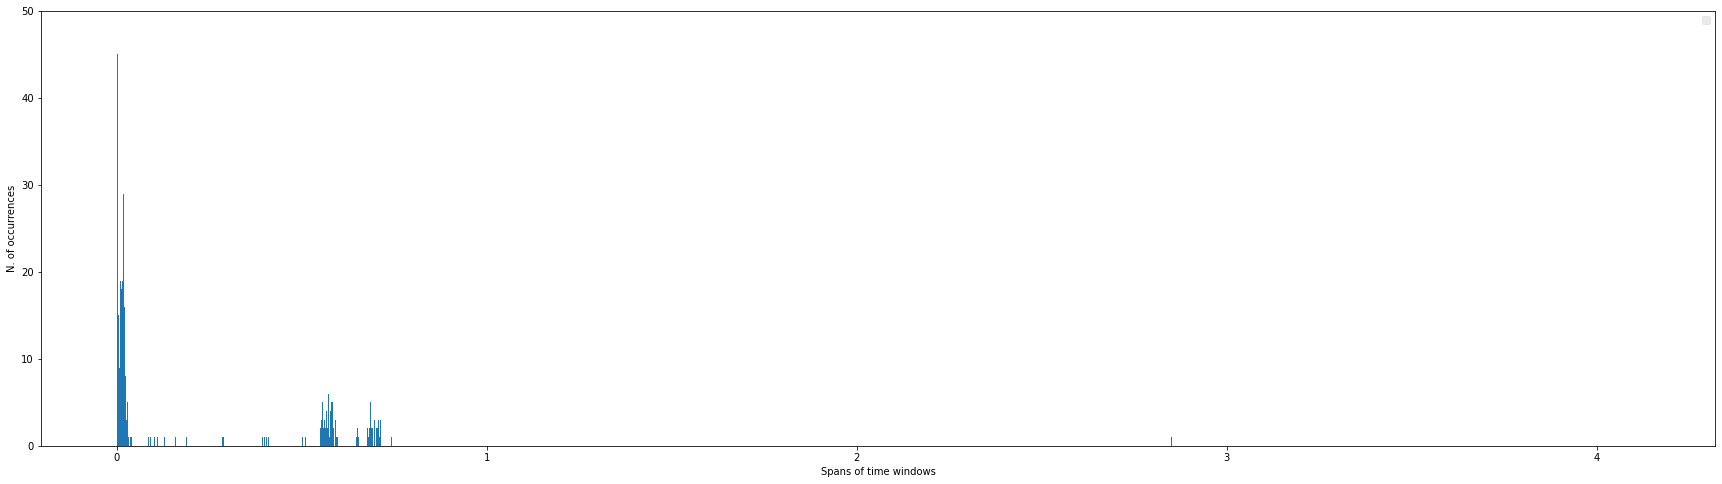

In [10]:
print (skew(b)) #data are not normally distributed
variance = statistics.variance(b, xbar=None) #variance
std_dev = statistics.stdev(b) #std.dev
print(variance, "\n",std_dev)
wbin = 1/len(b)
nbins = np.arange(min(b), max(b) + wbin, wbin)

#histogram
plt.figure(figsize=(30,8))
plt.hist(b, bins = nbins, histtype='bar', align='mid', color=None, label=None)
plt.ylim(0, 50)
plt.style.use('ggplot')
plt.legend()
plt.ylabel('N. of occurrences')
plt.xlabel('Spans of time windows')
plt.show()

No handles with labels found to put in legend.


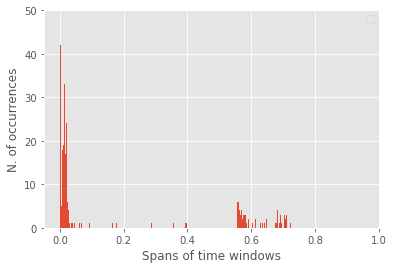

In [11]:

hist, bins, _ =  plt.hist(b, bins = nbins, histtype='bar', align='mid', color=None, label=None)
plt.xlim(-0.05, 1)
plt.ylim(0, 50)
plt.style.use('ggplot')
plt.legend()
plt.ylabel('N. of occurrences')
plt.xlabel('Spans of time windows')
plt.show()

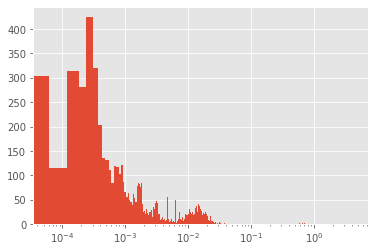

In [12]:
#log histogram
#b = pd.Series(b)
#logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),nbins)
#plt.subplot(212)
plt.hist(b, bins=nbins)
plt.xscale('log')
plt.show()

C:\Users\Utente\AppData\Local\Temp/ipykernel_3128/2004823741.py:2: RuntimeWarning: divide by zero encountered in log10
  logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))


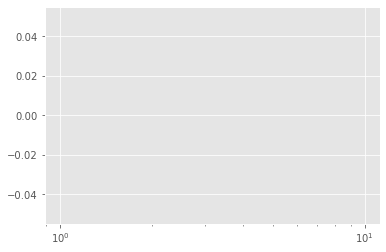

In [16]:

#hist, bins, _ = plt.hist(b, bins = nbins, histtype='bar', align='mid', color=None, label=None)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(b, bins = logbins, histtype='bar', align='mid', color=None, label=None)
#plt.xlim(-0.1, 1)
#plt.ylim(0, 50)
#plt.style.use('ggplot')
#plt.legend()
#plt.ylabel('N. of occurrences')
#plt.xlabel('Spans of time windows')
plt.xscale('log')
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [10., 8.]
plt.rcParams["figure.autolayout"] = True

path = "Joined_data/"

metallicity = [0.01, 0.02, 0.014, 0.016]
alpha = [0.5, 1, 3]

for i in metallicity :
    for j in alpha :
        df = pd.read_csv(path+"F_sevn_output_Z"+"{}".format(i)+"A"+"{}".format(j)+"L1/FZ"+"{}".format(i)+"A"+"{}".format(j)+".csv", sep=",")
        

#### Initial masses
from initial conditions dataset (evolved) to output dataset

In [13]:
pd.set_option('display.max_columns', None)
df

Unnamed: 0       ID               name    Mass_0  MHE_0  MCO_0  \
0                0       20  0_870253920596152  1.193763    0.0    0.0   
1                1       20  0_870253920596152  1.193763    0.0    0.0   
2                2      456  0_729815234037172  1.463958    0.0    0.0   
3                3      456  0_729815234037172  1.463958    0.0    0.0   
4                4      456  0_729815234037172  1.463969    0.0    0.0   
...            ...      ...                ...       ...    ...    ...   
347127      347130  3999578  0_139058318622113  1.715090    0.0    0.0   
347128      347125  3999578  0_139058318622113  1.714912    0.0    0.0   
347129      347124  3999578  0_139058318622113  1.714912    0.0    0.0   
347130      347126  3999578  0_139058318622113  1.714924    0.0    0.0   
347131      347131  3999578  0_139058318622113  1.715166    0.0    0.0   

        Radius_0  RHE_0  RCO_0  Luminosity_0  Temperature_0  Lambda_0  \
0       0.000016    0.0    0.0      0.002425       322337.4       NaN   
1       0.000016    0.0    0.0      0.002425       322337.4       NaN   
2       0.000016    0.0    0.0      0.008689       443501.1       NaN   
3       0.000016    0.0    0.0      0.008689       443501.1       NaN   
4       0.000016    0.0    0.0      0.008684       443431.6       NaN   
...          ...    ...    ...           ...            ...       ...   
347127  0.000016    0.0    0.0      0.001324       277114.1       NaN   
347128  0.000016    0.0    0.0      0.001330       277389.7       NaN   
347129  0.000016    0.0    0.0      0.001330       277389.7       NaN   
347130  0.000016    0.0    0.0      0.001329       277372.0       NaN   
347131  0.000016    0.0    0.0      0.001322       276996.3       NaN   

        Qconv_0  Depthconv_0  Phase_0  RemnantType_0    Zams_0     Mass_1  \
0           0.0          0.0        7              5  3.765557   8.500508   
1           0.0          0.0        7              5  3.765557   8.500508   
2           0.0          0.0        7              5  6.621468  10.005950   
3           0.0          0.0        7              5  6.621468  10.005950   
4           0.0          0.0        7              5  6.621468  10.003560   
...         ...          ...      ...            ...       ...        ...   
347127      0.0          0.0        7              5  8.554401   8.591520   
347128      0.0          0.0        7              5  8.554401   8.620891   
347129      0.0          0.0        7              5  8.554401   8.620891   
347130      0.0          0.0        7              5  8.554401   8.619219   
347131      0.0          0.0        7              5  8.554401   8.578574   

            MHE_1  MCO_1  Radius_1     RHE_1  RCO_1  Luminosity_1  \
0        8.500508    0.0  0.784215  0.784215    0.0      83207.16   
1        8.500508    0.0  0.784215  0.784215    0.0      83207.16   
2       10.005950    0.0  0.881776  0.881776    0.0     121576.70   
3       10.005950    0.0  0.881776  0.881776    0.0     121576.70   
4       10.003560    0.0  0.892383  0.892383    0.0     124963.00   
...           ...    ...       ...       ...    ...           ...   
347127   8.591520    0.0  0.837653  0.837653    0.0     101799.30   
347128   8.620891    0.0  0.787666  0.787666    0.0      85156.85   
347129   8.620891    0.0  0.787666  0.787666    0.0      85156.85   
347130   8.619219    0.0  0.804040  0.804040    0.0      89244.15   
347131   8.578574    0.0  0.837533  0.837533    0.0     101793.40   

        Temperature_1  Lambda_1  Qconv_1  Depthconv_1  Phase_1  RemnantType_1  \
0            110795.6  0.324020      0.0          0.0        4              0   
1            110795.6       NaN      0.0          0.0        4              0   
2            114877.1  0.414352      0.0          0.0        4              0   
3            114877.1       NaN      0.0          0.0        4              0   
4            114979.4       NaN      0.0          0.0        4              0   
..

In [14]:
path = "Joined_data/"
df_start = pd.read_csv(path+"F_sevn_output_Z"+"0.01"+"A"+"0.5"+"L1/init_Z"+"0_01"+"A"+"0_5.csv", sep=",")
df_start

Unnamed: 0      #ID               name  Mass_0   Z_0  spin_0   SN_0  \
0              20       20  0_870253920596152  33.707  0.01     0.0  rapid   
1             456      456  0_729815234037172  28.633  0.01     0.0  rapid   
2             676      676  0_707131269038790  47.983  0.01     0.0  rapid   
3             708      708  0_905885245507393  23.011  0.01     0.0  rapid   
4            1090     1090  0_180275932526029  26.646  0.01     0.0  rapid   
...           ...      ...                ...     ...   ...     ...    ...   
16127     3864914  3994914  0_368667380390756  28.452  0.01     0.0  rapid   
16128     3865203  3995203  0_744573640918974  25.842  0.01     0.0  rapid   
16129     3865912  3995912  0_826562199281032  18.059  0.01     0.0  rapid   
16130     3866351  3996351  0_973853609758256  36.294  0.01     0.0  rapid   
16131     3866552  3996552  0_764963990675650  28.474  0.01     0.0  rapid   

      Tstart_0  Mass_1   Z_1  spin_1   SN_1 Tstart_1      a        e Tend  \
0         zams  10.526  0.01     0.0  rapid     zams   24.4  0.32600  end   
1         zams  16.685  0.01     0.0  rapid     zams   23.2  0.00770  end   
2         zams   6.753  0.01     0.0  rapid     zams  199.0  0.79900  end   
3         zams  18.671  0.01     0.0  rapid     zams   53.4  0.14200  end   
4         zams  20.090  0.01     0.0  rapid     zams   85.9  0.50300  end   
...        ...     ...   ...     ...    ...      ...    ...      ...  ...   
16127     zams  10.669  0.01     0.0  rapid     zams   26.3  0.11600  end   
16128     zams  18.463  0.01     0.0  rapid     zams   36.2  0.44300  end   
16129     zams  13.463  0.01     0.0  rapid     zams  110.0  0.00148  end   
16130     zams  13.759  0.01     0.0  rapid     zams   31.1  0.04140  end   
16131     zams  17.563  0.01     0.0  rapid     zams   25.6  0.18000  end   

      Dtout             Seed  
0       all  387198696112961  
1       all  575047637394671  
2       all  303128195870420  
3       all  704636547975088  
4       all  928692552436124  
...     ...              ...  
16127   all  702000367986461  
16128   all  957983304389275  
16129   all  664271284638319  
16130   all   60749920134374  
16131   all  365680512626628  

[16132 rows x 18 columns]

In [31]:
df_start.sort_values(by='#ID')
df_start

Unnamed: 0      #ID               name  Mass_0   Z_0  spin_0   SN_0  \
0              20       20  0_870253920596152  33.707  0.01     0.0  rapid   
1             456      456  0_729815234037172  28.633  0.01     0.0  rapid   
2             676      676  0_707131269038790  47.983  0.01     0.0  rapid   
3             708      708  0_905885245507393  23.011  0.01     0.0  rapid   
4            1090     1090  0_180275932526029  26.646  0.01     0.0  rapid   
...           ...      ...                ...     ...   ...     ...    ...   
16127     3864914  3994914  0_368667380390756  28.452  0.01     0.0  rapid   
16128     3865203  3995203  0_744573640918974  25.842  0.01     0.0  rapid   
16129     3865912  3995912  0_826562199281032  18.059  0.01     0.0  rapid   
16130     3866351  3996351  0_973853609758256  36.294  0.01     0.0  rapid   
16131     3866552  3996552  0_764963990675650  28.474  0.01     0.0  rapid   

      Tstart_0  Mass_1   Z_1  spin_1   SN_1 Tstart_1      a        e Tend  \
0         zams  10.526  0.01     0.0  rapid     zams   24.4  0.32600  end   
1         zams  16.685  0.01     0.0  rapid     zams   23.2  0.00770  end   
2         zams   6.753  0.01     0.0  rapid     zams  199.0  0.79900  end   
3         zams  18.671  0.01     0.0  rapid     zams   53.4  0.14200  end   
4         zams  20.090  0.01     0.0  rapid     zams   85.9  0.50300  end   
...        ...     ...   ...     ...    ...      ...    ...      ...  ...   
16127     zams  10.669  0.01     0.0  rapid     zams   26.3  0.11600  end   
16128     zams  18.463  0.01     0.0  rapid     zams   36.2  0.44300  end   
16129     zams  13.463  0.01     0.0  rapid     zams  110.0  0.00148  end   
16130     zams  13.759  0.01     0.0  rapid     zams   31.1  0.04140  end   
16131     zams  17.563  0.01     0.0  rapid     zams   25.6  0.18000  end   

      Dtout             Seed  
0       all  387198696112961  
1       all  575047637394671  
2       all  303128195870420  
3       all  704636547975088  
4       all  928692552436124  
...     ...              ...  
16127   all  702000367986461  
16128   all  957983304389275  
16129   all  664271284638319  
16130   all   60749920134374  
16131   all  365680512626628  

[16132 rows x 18 columns]

In [85]:
#df_start.rename(columns = {'#ID':'ID'}, inplace = True)
df_3=df.merge(df_start, how='left', left_on='ID', right_on='ID')
#df.join(df_start.set_index('#ID'), on='ID')
#df_start.join(df.set_index('ID'), on='#ID', lsuffix='_evolved', rsuffix='_output')
df_3

Unnamed: 0_x       ID             name_x  Mass_0_x  MHE_0  MCO_0  \
0                  0       20  0_870253920596152  1.193763    0.0    0.0   
1                  1       20  0_870253920596152  1.193763    0.0    0.0   
2                  2      456  0_729815234037172  1.463958    0.0    0.0   
3                  3      456  0_729815234037172  1.463958    0.0    0.0   
4                  4      456  0_729815234037172  1.463969    0.0    0.0   
...              ...      ...                ...       ...    ...    ...   
347127        347130  3999578  0_139058318622113  1.715090    0.0    0.0   
347128        347125  3999578  0_139058318622113  1.714912    0.0    0.0   
347129        347124  3999578  0_139058318622113  1.714912    0.0    0.0   
347130        347126  3999578  0_139058318622113  1.714924    0.0    0.0   
347131        347131  3999578  0_139058318622113  1.715166    0.0    0.0   

        Radius_0  RHE_0  RCO_0  Luminosity_0  Temperature_0  Lambda_0  \
0       0.000016    0.0    0.0      0.002425       322337.4       NaN   
1       0.000016    0.0    0.0      0.002425       322337.4       NaN   
2       0.000016    0.0    0.0      0.008689       443501.1       NaN   
3       0.000016    0.0    0.0      0.008689       443501.1       NaN   
4       0.000016    0.0    0.0      0.008684       443431.6       NaN   
...          ...    ...    ...           ...            ...       ...   
347127  0.000016    0.0    0.0      0.001324       277114.1       NaN   
347128  0.000016    0.0    0.0      0.001330       277389.7       NaN   
347129  0.000016    0.0    0.0      0.001330       277389.7       NaN   
347130  0.000016    0.0    0.0      0.001329       277372.0       NaN   
347131  0.000016    0.0    0.0      0.001322       276996.3       NaN   

        Qconv_0  Depthconv_0  Phase_0  RemnantType_0    Zams_0   Mass_1_x  \
0           0.0          0.0        7              5  3.765557   8.500508   
1           0.0          0.0        7              5  3.765557   8.500508   
2           0.0          0.0        7              5  6.621468  10.005950   
3           0.0          0.0        7              5  6.621468  10.005950   
4           0.0          0.0        7              5  6.621468  10.003560   
...         ...          ...      ...            ...       ...        ...   
347127      0.0          0.0        7              5  8.554401   8.591520   
347128      0.0          0.0        7              5  8.554401   8.620891   
347129      0.0          0.0        7              5  8.554401   8.620891   
347130      0.0          0.0        7              5  8.554401   8.619219   
347131      0.0          0.0        7              5  8.554401   8.578574   

            MHE_1  MCO_1  Radius_1     RHE_1  RCO_1  Luminosity_1  \
0        8.500508    0.0  0.784215  0.784215    0.0      83207.16   
1        8.500508    0.0  0.784215  0.784215    0.0      83207.16   
2       10.005950    0.0  0.881776  0.881776    0.0     121576.70   
3       10.005950    0.0  0.881776  0.881776    0.0     121576.70   
4       10.003560    0.0  0.892383  0.892383    0.0     124963.00   
...           ...    ...       ...       ...    ...           ...   
347127   8.591520    0.0  0.837653  0.837653    0.0     101799.30   
347128   8.620891    0.0  0.787666  0.787666    0.0      85156.85   
347129   8.620891    0.0  0.787666  0.787666    0.0      85156.85   
347130   8.619219    0.0  0.804040  0.804040    0.0      89244.15   
347131   8.578574    0.0  0.837533  0.837533    0.0     101793.40   

        Temperature_1  Lambda_1  Qconv_1  Depthconv_1  Phase_1  RemnantType_1  \
0            110795.6  0.324020      0.0          0.0        4              0   
1            110795.6       NaN      0.0          0.0        4              0   
2            114877.1  0.414352      0.0          0.0        4              0   
3            114877.1       NaN      0.0          0.0        4              0   
4            114979.4       NaN      0.0          0.0      

In [86]:
df_3.loc[df_3['ID'] == 3999578] #why????

Unnamed: 0_x       ID             name_x  Mass_0_x  MHE_0  MCO_0  \
347124        347128  3999578  0_139058318622113  1.714988    0.0    0.0   
347125        347129  3999578  0_139058318622113  1.715033    0.0    0.0   
347126        347127  3999578  0_139058318622113  1.714951    0.0    0.0   
347127        347130  3999578  0_139058318622113  1.715090    0.0    0.0   
347128        347125  3999578  0_139058318622113  1.714912    0.0    0.0   
347129        347124  3999578  0_139058318622113  1.714912    0.0    0.0   
347130        347126  3999578  0_139058318622113  1.714924    0.0    0.0   
347131        347131  3999578  0_139058318622113  1.715166    0.0    0.0   

        Radius_0  RHE_0  RCO_0  Luminosity_0  Temperature_0  Lambda_0  \
347124  0.000016    0.0    0.0      0.001327       277271.8       NaN   
347125  0.000016    0.0    0.0      0.001326       277203.1       NaN   
347126  0.000016    0.0    0.0      0.001329       277329.0       NaN   
347127  0.000016    0.0    0.0      0.001324       277114.1       NaN   
347128  0.000016    0.0    0.0      0.001330       277389.7       NaN   
347129  0.000016    0.0    0.0      0.001330       277389.7       NaN   
347130  0.000016    0.0    0.0      0.001329       277372.0       NaN   
347131  0.000016    0.0    0.0      0.001322       276996.3       NaN   

        Qconv_0  Depthconv_0  Phase_0  RemnantType_0    Zams_0  Mass_1_x  \
347124      0.0          0.0        7              5  8.554401  8.608774   
347125      0.0          0.0        7              5  8.554401  8.601298   
347126      0.0          0.0        7              5  8.554401  8.614979   
347127      0.0          0.0        7              5  8.554401  8.591520   
347128      0.0          0.0        7              5  8.554401  8.620891   
347129      0.0          0.0        7              5  8.554401  8.620891   
347130      0.0          0.0        7              5  8.554401  8.619219   
347131      0.0          0.0        7              5  8.554401  8.578574   

           MHE_1  MCO_1  Radius_1     RHE_1  RCO_1  Luminosity_1  \
347124  8.608774    0.0  0.836442  0.836442    0.0      99555.06   
347125  8.601298    0.0  0.837744  0.837744    0.0     101803.80   
347126  8.614979    0.0  0.835309  0.835309    0.0      97646.56   
347127  8.591520    0.0  0.837653  0.837653    0.0     101799.30   
347128  8.620891    0.0  0.787666  0.787666    0.0      85156.85   
347129  8.620891    0.0  0.787666  0.787666    0.0      85156.85   
347130  8.619219    0.0  0.804040  0.804040    0.0      89244.15   
347131  8.578574    0.0  0.837533  0.837533    0.0     101793.40   

        Temperature_1  Lambda_1  Qconv_1  Depthconv_1  Phase_1  RemnantType_1  \
347124       112201.3       NaN      0.0          0.0        4              0   
347125       112741.9       NaN      0.0          0.0        4              0   
347126       111735.4       NaN      0.0          0.0        4              0   
347127       112746.8       NaN      0.0          0.0        4              0   
347128       111194.7       NaN      0.0          0.0        4              0   
347129       111194.7  0.345145      0.0          0.0        4              0   
347130       111354.1       NaN      0.0          0.0        4              0   
347131       112753.2       NaN      0.0          0.0        4              0   

          Zams_1  Semimajor    Period  Eccentricity       RL0       RL1  \
347124  8.620891   1.772516  0.000233           0.0  0.445741  0.923640   
347125  8.620891   1.843651  0.000247           0.0  0.463744  0.960566   
347126  8.620891   1.698933  0.000218           0.0  0.427149  0.885405   
347127  8.620891   1.916002  0.000262           0.0  0.482099  0.998069   
347128  8.620891   1.619093  0.000203           0.0  0.406996  0.843894   
347129  8.620891   1.619093  0.000203           0.0  0.406996  0.843894   
347130  8.620891   1.642267  0.000208           0.0  0.412844  0.855945   
347131  8.620891   1.986436  0.000277

In [44]:
c = df_3['ID'].unique().tolist()
print(len(c))


16654


In [43]:
df_3un = df_3.drop_duplicates(subset=['ID'])
df_3un

Unnamed: 0_x       ID             name_x  Mass_0_x  MHE_0  MCO_0  \
0                  0       20  0_870253920596152  1.193763    0.0    0.0   
2                  2      456  0_729815234037172  1.463958    0.0    0.0   
9                 13      676  0_707131269038790  1.193962    0.0    0.0   
14                23      708  0_905885245507393  1.633361    0.0    0.0   
31                44     1090  0_180275932526029  1.859628    0.0    0.0   
...              ...      ...                ...       ...    ...    ...   
347085        347085  3998168  0_819049023835347  1.748927    0.0    0.0   
347090        347098  3998209  0_353106035615482  1.527066    0.0    0.0   
347099        347103  3998989  0_223482943156093  1.193905    0.0    0.0   
347105        347116  3999434  0_510492271156870  1.634691    0.0    0.0   
347124        347128  3999578  0_139058318622113  1.714988    0.0    0.0   

        Radius_0  RHE_0  RCO_0  Luminosity_0  Temperature_0  Lambda_0  \
0       0.000016    0.0    0.0      0.002425       322337.4       NaN   
2       0.000016    0.0    0.0      0.008689       443501.1       NaN   
9       0.000016    0.0    0.0      0.001222       271582.2       NaN   
14      0.000016    0.0    0.0      0.028404       596345.2       NaN   
31      0.000016    0.0    0.0      0.091327       798551.0       NaN   
...          ...    ...    ...           ...            ...       ...   
347085  0.000016    0.0    0.0      0.004618       378674.8       NaN   
347090  0.000016    0.0    0.0      0.014445       503595.1       NaN   
347099  0.000016    0.0    0.0      0.003374       350108.8       NaN   
347105  0.000016    0.0    0.0      0.021228       554470.1       NaN   
347124  0.000016    0.0    0.0      0.001327       277271.8       NaN   

        Qconv_0  Depthconv_0  Phase_0  RemnantType_0    Zams_0   Mass_1_x  \
0           0.0          0.0        7              5  3.765557   8.500508   
2           0.0          0.0        7              5  6.621468  10.005950   
9           0.0          0.0        7              5  3.830012   9.168485   
14          0.0          0.0        7              5  7.831329   7.981463   
31          0.0          0.0        7              5  9.816801  25.931650   
...         ...          ...      ...            ...       ...        ...   
347085      0.0          0.0        7              5  8.852851   7.721686   
347090      0.0          0.0        7              5  7.090889   7.754207   
347099      0.0          0.0        7              5  4.177857   7.823940   
347105      0.0          0.0        7              5  7.824315   7.487264   
347124      0.0          0.0        7              5  8.554401   8.608774   

            MHE_1  MCO_1   Radius_1     RHE_1  RCO_1  Luminosity_1  \
0        8.500508    0.0   0.784215  0.784215    0.0      83207.16   
2       10.005950    0.0   0.881776  0.881776    0.0     121576.70   
9        9.168485    0.0   0.872712  0.872712    0.0     112626.50   
14       7.981463    0.0   0.865366  0.865366    0.0     118826.50   
31       0.000000    0.0  20.749260  0.000000    0.0     204305.30   
...           ...    ...        ...       ...    ...           ...   
347085   7.721686    0.0   0.735967  0.735967    0.0      66405.87   
347090   7.754207    0.0   0.789660  0.789660    0.0      82216.90   
347099   7.823940    0.0   0.787525  0.787525    0.0      80175.79   
347105   7.487264    0.0   0.817073  0.817073    0.0     116445.40   
347124   8.608774    0.0   0.836442  0.836442    0.0      99555.06   

        Temperature_1  Lambda_1  Qconv_1  Depthconv_1  Phase_1  RemnantType_1  \
0           110795.60  0.324020      0.0          0.0        4              0   
2           114877.10  0.414352      0.0          0.0        4              0   
9           113285.60       NaN      0.0          0.0        4              0   
14          115299.70       NaN      0.0          0.0        4              0   
31           26963.03       NaN      0.0       

Text(0, 0.5, 'Occurrences')

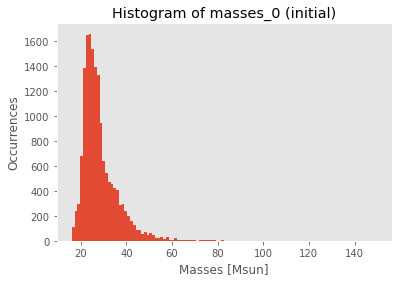

In [60]:
#max_Mass_0_y = df_3un.loc[df_3un["Mass_0_y"].idxmax()]
#mim_Mass_0_y = df_3un.loc[df_3un["Mass_0_y"].idxmin()]
#print(max_Mass_0_y, mim_Mass_0_y)
df_3un.hist(column="Mass_0_y", bins=110, grid=False)
pl.title("Histogram of masses_0 (initial)")
pl.xlabel("Masses [Msun]")
pl.ylabel("Occurrences")

Text(0, 0.5, 'Occurrences')

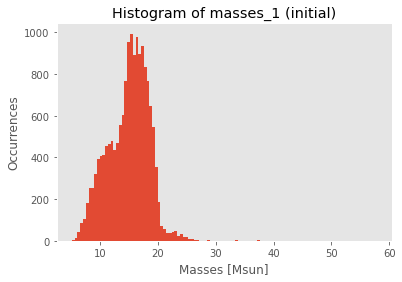

In [59]:
df_3un.hist(column="Mass_1_y", bins=110, grid=False)
pl.title("Histogram of masses_1 (initial)")
pl.xlabel("Masses [Msun]")
pl.ylabel("Occurrences")

In [67]:
#convert column in array
Mass_0_y = df_3un['Mass_0_y'].to_numpy()
Mass_1_y = df_3un['Mass_1_y'].to_numpy()

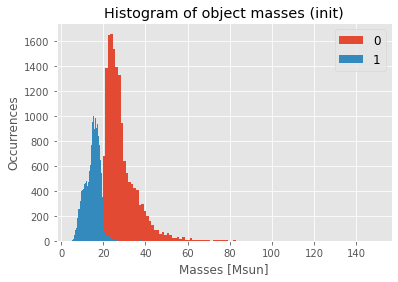

In [69]:
plt.hist(Mass_0_y, bins=110, label=0)
plt.hist(Mass_1_y, bins=110, label=1)
# Plot formatting
plt.legend(prop={'size': 12})
plt.title("Histogram of object masses (init)")
plt.xlabel("Masses [Msun]")
plt.ylabel("Occurrences")
plt.show()

#### Masses of the evovling objects

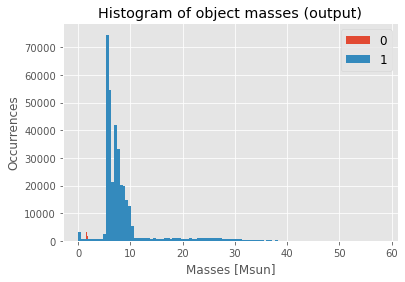

In [71]:
#convert column in array
Mass_0_x = df_3['Mass_0_x'].to_numpy()
Mass_1_x = df_3['Mass_1_x'].to_numpy()

plt.hist(Mass_0_x, bins=110, label=0)
plt.hist(Mass_1_x, bins=110, label=1)
# Plot formatting
plt.legend(prop={'size': 12})
plt.title("Histogram of object masses (output)")
plt.xlabel("Masses [Msun]")
plt.ylabel("Occurrences")
plt.show()

No handles with labels found to put in legend.


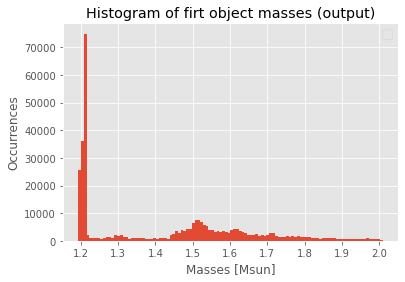

In [72]:
plt.hist(Mass_0_x, bins=110)
plt.legend(prop={'size': 12})
plt.title("Histogram of firt object masses (output)")
plt.xlabel("Masses [Msun]")
plt.ylabel("Occurrences")
plt.show()

#### print the remnant type of the second object
is it always zero? yes, probably because the second object is always the less massive one at start, so it is always a donor of mass.

In [16]:
pd.set_option('display.max_columns', None)
df_start[df_start["Mass_0"]<df_start["Mass_1"]]

Empty DataFrame
Columns: [Unnamed: 0, #ID, name, Mass_0, Z_0, spin_0, SN_0, Tstart_0, Mass_1, Z_1, spin_1, SN_1, Tstart_1, a, e, Tend, Dtout, Seed]
Index: []

In [17]:
df_start[df_start["Mass_0"]>df_start["Mass_1"]]

Unnamed: 0      #ID               name  Mass_0   Z_0  spin_0   SN_0  \
0              20       20  0_870253920596152  33.707  0.01     0.0  rapid   
1             456      456  0_729815234037172  28.633  0.01     0.0  rapid   
2             676      676  0_707131269038790  47.983  0.01     0.0  rapid   
3             708      708  0_905885245507393  23.011  0.01     0.0  rapid   
4            1090     1090  0_180275932526029  26.646  0.01     0.0  rapid   
...           ...      ...                ...     ...   ...     ...    ...   
16127     3864914  3994914  0_368667380390756  28.452  0.01     0.0  rapid   
16128     3865203  3995203  0_744573640918974  25.842  0.01     0.0  rapid   
16129     3865912  3995912  0_826562199281032  18.059  0.01     0.0  rapid   
16130     3866351  3996351  0_973853609758256  36.294  0.01     0.0  rapid   
16131     3866552  3996552  0_764963990675650  28.474  0.01     0.0  rapid   

      Tstart_0  Mass_1   Z_1  spin_1   SN_1 Tstart_1      a        e Tend  \
0         zams  10.526  0.01     0.0  rapid     zams   24.4  0.32600  end   
1         zams  16.685  0.01     0.0  rapid     zams   23.2  0.00770  end   
2         zams   6.753  0.01     0.0  rapid     zams  199.0  0.79900  end   
3         zams  18.671  0.01     0.0  rapid     zams   53.4  0.14200  end   
4         zams  20.090  0.01     0.0  rapid     zams   85.9  0.50300  end   
...        ...     ...   ...     ...    ...      ...    ...      ...  ...   
16127     zams  10.669  0.01     0.0  rapid     zams   26.3  0.11600  end   
16128     zams  18.463  0.01     0.0  rapid     zams   36.2  0.44300  end   
16129     zams  13.463  0.01     0.0  rapid     zams  110.0  0.00148  end   
16130     zams  13.759  0.01     0.0  rapid     zams   31.1  0.04140  end   
16131     zams  17.563  0.01     0.0  rapid     zams   25.6  0.18000  end   

      Dtout             Seed  
0       all  387198696112961  
1       all  575047637394671  
2       all  303128195870420  
3       all  704636547975088  
4       all  928692552436124  
...     ...              ...  
16127   all  702000367986461  
16128   all  957983304389275  
16129   all  664271284638319  
16130   all   60749920134374  
16131   all  365680512626628  

[16132 rows x 18 columns]

In [18]:
df[df["Mass_0"]<df["Mass_1"]]

Unnamed: 0       ID               name    Mass_0  MHE_0  MCO_0  \
0                0       20  0_870253920596152  1.193763    0.0    0.0   
1                1       20  0_870253920596152  1.193763    0.0    0.0   
2                2      456  0_729815234037172  1.463958    0.0    0.0   
3                3      456  0_729815234037172  1.463958    0.0    0.0   
4                4      456  0_729815234037172  1.463969    0.0    0.0   
...            ...      ...                ...       ...    ...    ...   
347127      347130  3999578  0_139058318622113  1.715090    0.0    0.0   
347128      347125  3999578  0_139058318622113  1.714912    0.0    0.0   
347129      347124  3999578  0_139058318622113  1.714912    0.0    0.0   
347130      347126  3999578  0_139058318622113  1.714924    0.0    0.0   
347131      347131  3999578  0_139058318622113  1.715166    0.0    0.0   

        Radius_0  RHE_0  RCO_0  Luminosity_0  Temperature_0  Lambda_0  \
0       0.000016    0.0    0.0      0.002425       322337.4       NaN   
1       0.000016    0.0    0.0      0.002425       322337.4       NaN   
2       0.000016    0.0    0.0      0.008689       443501.1       NaN   
3       0.000016    0.0    0.0      0.008689       443501.1       NaN   
4       0.000016    0.0    0.0      0.008684       443431.6       NaN   
...          ...    ...    ...           ...            ...       ...   
347127  0.000016    0.0    0.0      0.001324       277114.1       NaN   
347128  0.000016    0.0    0.0      0.001330       277389.7       NaN   
347129  0.000016    0.0    0.0      0.001330       277389.7       NaN   
347130  0.000016    0.0    0.0      0.001329       277372.0       NaN   
347131  0.000016    0.0    0.0      0.001322       276996.3       NaN   

        Qconv_0  Depthconv_0  Phase_0  RemnantType_0    Zams_0     Mass_1  \
0           0.0          0.0        7              5  3.765557   8.500508   
1           0.0          0.0        7              5  3.765557   8.500508   
2           0.0          0.0        7              5  6.621468  10.005950   
3           0.0          0.0        7              5  6.621468  10.005950   
4           0.0          0.0        7              5  6.621468  10.003560   
...         ...          ...      ...            ...       ...        ...   
347127      0.0          0.0        7              5  8.554401   8.591520   
347128      0.0          0.0        7              5  8.554401   8.620891   
347129      0.0          0.0        7              5  8.554401   8.620891   
347130      0.0          0.0        7              5  8.554401   8.619219   
347131      0.0          0.0        7              5  8.554401   8.578574   

            MHE_1  MCO_1  Radius_1     RHE_1  RCO_1  Luminosity_1  \
0        8.500508    0.0  0.784215  0.784215    0.0      83207.16   
1        8.500508    0.0  0.784215  0.784215    0.0      83207.16   
2       10.005950    0.0  0.881776  0.881776    0.0     121576.70   
3       10.005950    0.0  0.881776  0.881776    0.0     121576.70   
4       10.003560    0.0  0.892383  0.892383    0.0     124963.00   
...           ...    ...       ...       ...    ...           ...   
347127   8.591520    0.0  0.837653  0.837653    0.0     101799.30   
347128   8.620891    0.0  0.787666  0.787666    0.0      85156.85   
347129   8.620891    0.0  0.787666  0.787666    0.0      85156.85   
347130   8.619219    0.0  0.804040  0.804040    0.0      89244.15   
347131   8.578574    0.0  0.837533  0.837533    0.0     101793.40   

        Temperature_1  Lambda_1  Qconv_1  Depthconv_1  Phase_1  RemnantType_1  \
0            110795.6  0.324020      0.0          0.0        4              0   
1            110795.6       NaN      0.0          0.0        4              0   
2            114877.1  0.414352      0.0          0.0        4              0   
3            114877.1       NaN      0.0          0.0        4              0   
4            114979.4       NaN      0.0          0.0        4              0   
..

In [19]:
df[df["Mass_0"]>df["Mass_1"]]

Unnamed: 0       ID               name    Mass_0  MHE_0  MCO_0  \
774          11971    12646  0_368560710107917  1.248605    0.0    0.0   
775          11972    12646  0_368560710107917  1.248605    0.0    0.0   
776          11973    12646  0_368560710107917  1.248605    0.0    0.0   
777          11977    12646  0_368560710107917  1.248605    0.0    0.0   
778          11975    12646  0_368560710107917  1.248605    0.0    0.0   
...            ...      ...                ...       ...    ...    ...   
342785      150727  3942529  0_335194715251492  1.390336    0.0    0.0   
342786      150730  3942529  0_335194715251492  1.390336    0.0    0.0   
342787      150729  3942529  0_335194715251492  1.390336    0.0    0.0   
342788      150728  3942529  0_335194715251492  1.390336    0.0    0.0   
342789      150731  3942529  0_335194715251492  1.390336    0.0    0.0   

        Radius_0  RHE_0  RCO_0  Luminosity_0  Temperature_0  Lambda_0  \
774     0.000016    0.0    0.0      2.319067      1792589.0       NaN   
775     0.000016    0.0    0.0      2.319067      1792589.0       NaN   
776     0.000016    0.0    0.0      2.319067      1792589.0       NaN   
777     0.000016    0.0    0.0      2.319067      1792589.0       NaN   
778     0.000016    0.0    0.0      2.319067      1792589.0       NaN   
...          ...    ...    ...           ...            ...       ...   
342785  0.000016    0.0    0.0      2.414411      1810736.0       NaN   
342786  0.000016    0.0    0.0      2.057918      1739840.0       NaN   
342787  0.000016    0.0    0.0      2.176130      1764304.0       NaN   
342788  0.000016    0.0    0.0      2.295146      1787948.0       NaN   
342789  0.000016    0.0    0.0      1.941059      1714597.0       NaN   

        Qconv_0  Depthconv_0  Phase_0  RemnantType_0    Zams_0    Mass_1  \
774         0.0          0.0        7              5  5.083386  1.235850   
775         0.0          0.0        7              5  5.083386  1.180890   
776         0.0          0.0        7              5  5.083386  1.128340   
777         0.0          0.0        7              5  5.083386  0.940192   
778         0.0          0.0        7              5  5.083386  1.030051   
...         ...          ...      ...            ...       ...       ...   
342785      0.0          0.0        7              5  6.102735  1.364351   
342786      0.0          0.0        7              5  6.102735  1.190832   
342787      0.0          0.0        7              5  6.102735  1.246115   
342788      0.0          0.0        7              5  6.102735  1.303916   
342789      0.0          0.0        7              5  6.102735  1.137958   

        MHE_1  MCO_1  Radius_1  RHE_1  RCO_1  Luminosity_1  Temperature_1  \
774       0.0    0.0  2.354310    0.0    0.0      29.29173       8758.999   
775       0.0    0.0  2.354315    0.0    0.0      29.29177       8758.993   
776       0.0    0.0  2.354321    0.0    0.0      29.29182       8758.986   
777       0.0    0.0  2.354346    0.0    0.0      29.29203       8758.955   
778       0.0    0.0  2.354332    0.0    0.0      29.29192       8758.972   
...       ...    ...       ...    ...    ...           ...            ...   
342785    0.0    0.0  2.418417    0.0    0.0      29.74199       8675.150   
342786    0.0    0.0  2.418454    0.0    0.0      29.74216       8675.096   
342787    0.0    0.0  2.418440    0.0    0.0      29.74210       8675.116   
342788    0.0    0.0  2.418428    0.0    0.0      29.74204       8675.134   
342789    0.0    0.0  2.418468    0.0    0.0      29.74222       8675.076   

        Lambda_1  Qconv_1  Depthconv_1  Phase_1  RemnantType_1  Zams_1  \
774          NaN      0.0          0.0        1              0     2.0   
775          NaN      0.0          0.0        1              0     2.0   
776          NaN      0.0          0.0        1              0     2.0   
777          NaN      0.0          0.0        1              0     2.0   
778          NaN      0.0         

In [20]:
df[df["RemnantType_1"]!=0]

Empty DataFrame
Columns: [Unnamed: 0, ID, name, Mass_0, MHE_0, MCO_0, Radius_0, RHE_0, RCO_0, Luminosity_0, Temperature_0, Lambda_0, Qconv_0, Depthconv_0, Phase_0, RemnantType_0, Zams_0, Mass_1, MHE_1, MCO_1, Radius_1, RHE_1, RCO_1, Luminosity_1, Temperature_1, Lambda_1, Qconv_1, Depthconv_1, Phase_1, RemnantType_1, Zams_1, Semimajor, Period, Eccentricity, RL0, RL1, BWorldtime, BEvent]
Index: []

In [21]:
df[df["RemnantType_0"]==4]

Unnamed: 0       ID               name    Mass_0  MHE_0  MCO_0  \
3376         49144    42347  0_383448629761885  1.297021    0.0    0.0   
3377         49143    42347  0_383448629761885  1.297021    0.0    0.0   
3378         49142    42347  0_383448629761885  1.297021    0.0    0.0   
3379         49141    42347  0_383448629761885  1.297021    0.0    0.0   
3380         49140    42347  0_383448629761885  1.297021    0.0    0.0   
...            ...      ...                ...       ...    ...    ...   
344017      206330  3957216  0_265892554877996  1.294964    0.0    0.0   
344018      206327  3957216  0_265892554877996  1.294963    0.0    0.0   
344019      206328  3957216  0_265892554877996  1.294963    0.0    0.0   
344020      206329  3957216  0_265892554877996  1.294963    0.0    0.0   
344021      206321  3957216  0_265892554877996  1.294963    0.0    0.0   

        Radius_0  RHE_0  RCO_0  Luminosity_0  Temperature_0  Lambda_0  \
3376    0.000016    0.0    0.0      0.002400       321520.6       NaN   
3377    0.000016    0.0    0.0      0.002400       321520.8       NaN   
3378    0.000016    0.0    0.0      0.002400       321521.0       NaN   
3379    0.000016    0.0    0.0      0.002400       321521.1       NaN   
3380    0.000016    0.0    0.0      0.002400       321521.3       NaN   
...          ...    ...    ...           ...            ...       ...   
344017  0.000016    0.0    0.0      0.001575       289376.9       NaN   
344018  0.000016    0.0    0.0      0.001575       289377.6       NaN   
344019  0.000016    0.0    0.0      0.001575       289377.4       NaN   
344020  0.000016    0.0    0.0      0.001575       289377.2       NaN   
344021  0.000016    0.0    0.0      0.001575       289378.5       NaN   

        Qconv_0  Depthconv_0  Phase_0  RemnantType_0    Zams_0    Mass_1  \
3376        0.0          0.0        7              4  2.831479  6.004268   
3377        0.0          0.0        7              4  2.831479  6.004278   
3378        0.0          0.0        7              4  2.831479  6.004287   
3379        0.0          0.0        7              4  2.831479  6.004296   
3380        0.0          0.0        7              4  2.831479  6.004304   
...         ...          ...      ...            ...       ...       ...   
344017      0.0          0.0        7              4  2.826186  5.851285   
344018      0.0          0.0        7              4  2.826186  5.851328   
344019      0.0          0.0        7              4  2.826186  5.851315   
344020      0.0          0.0        7              4  2.826186  5.851301   
344021      0.0          0.0        7              4  2.826186  5.851389   

           MHE_1     MCO_1  Radius_1     RHE_1     RCO_1  Luminosity_1  \
3376    6.004268  2.354728  0.616031  0.616031  0.102975      85477.37   
3377    6.004278  2.280070  0.616070  0.616070  0.099710      85473.94   
3378    6.004287  2.208771  0.616108  0.616108  0.096592      85470.66   
3379    6.004296  2.140420  0.616144  0.616144  0.093603      85467.52   
3380    6.004304  2.074684  0.616179  0.616179  0.090728      85464.50   
...          ...       ...       ...       ...       ...           ...   
344017  5.851285  2.885578  0.606605  0.606605  0.128428      80292.67   
344018  5.851328  2.554270  0.606786  0.606786  0.113682      80277.00   
344019  5.851315  2.653397  0.606732  0.606732  0.118094      80281.69   
344020  5.851301  2.762601  0.606672  0.606672  0.122954      80286.85   
344021  5.851389  2.081196  0.607046  0.607046  0.092627      80254.64   

        Temperature_1  Lambda_1  Qconv_1  Depthconv_1  Phase_1  RemnantType_1  \
3376         125852.5       0.5      0.0          0.0        5              0   
3377         125847.2       0.5      0.0          0.0        5              0   
3378         125842.1       0.5      0.0          0.0        5              0   
3379         125837.3       0.5      0.0          0.0        5              0   
3380         125832.6       0.5    

In [22]:
df[df["RemnantType_0"]==5]

Unnamed: 0       ID               name    Mass_0  MHE_0  MCO_0  \
0                0       20  0_870253920596152  1.193763    0.0    0.0   
1                1       20  0_870253920596152  1.193763    0.0    0.0   
2                2      456  0_729815234037172  1.463958    0.0    0.0   
3                3      456  0_729815234037172  1.463958    0.0    0.0   
4                4      456  0_729815234037172  1.463969    0.0    0.0   
...            ...      ...                ...       ...    ...    ...   
347127      347130  3999578  0_139058318622113  1.715090    0.0    0.0   
347128      347125  3999578  0_139058318622113  1.714912    0.0    0.0   
347129      347124  3999578  0_139058318622113  1.714912    0.0    0.0   
347130      347126  3999578  0_139058318622113  1.714924    0.0    0.0   
347131      347131  3999578  0_139058318622113  1.715166    0.0    0.0   

        Radius_0  RHE_0  RCO_0  Luminosity_0  Temperature_0  Lambda_0  \
0       0.000016    0.0    0.0      0.002425       322337.4       NaN   
1       0.000016    0.0    0.0      0.002425       322337.4       NaN   
2       0.000016    0.0    0.0      0.008689       443501.1       NaN   
3       0.000016    0.0    0.0      0.008689       443501.1       NaN   
4       0.000016    0.0    0.0      0.008684       443431.6       NaN   
...          ...    ...    ...           ...            ...       ...   
347127  0.000016    0.0    0.0      0.001324       277114.1       NaN   
347128  0.000016    0.0    0.0      0.001330       277389.7       NaN   
347129  0.000016    0.0    0.0      0.001330       277389.7       NaN   
347130  0.000016    0.0    0.0      0.001329       277372.0       NaN   
347131  0.000016    0.0    0.0      0.001322       276996.3       NaN   

        Qconv_0  Depthconv_0  Phase_0  RemnantType_0    Zams_0     Mass_1  \
0           0.0          0.0        7              5  3.765557   8.500508   
1           0.0          0.0        7              5  3.765557   8.500508   
2           0.0          0.0        7              5  6.621468  10.005950   
3           0.0          0.0        7              5  6.621468  10.005950   
4           0.0          0.0        7              5  6.621468  10.003560   
...         ...          ...      ...            ...       ...        ...   
347127      0.0          0.0        7              5  8.554401   8.591520   
347128      0.0          0.0        7              5  8.554401   8.620891   
347129      0.0          0.0        7              5  8.554401   8.620891   
347130      0.0          0.0        7              5  8.554401   8.619219   
347131      0.0          0.0        7              5  8.554401   8.578574   

            MHE_1  MCO_1  Radius_1     RHE_1  RCO_1  Luminosity_1  \
0        8.500508    0.0  0.784215  0.784215    0.0      83207.16   
1        8.500508    0.0  0.784215  0.784215    0.0      83207.16   
2       10.005950    0.0  0.881776  0.881776    0.0     121576.70   
3       10.005950    0.0  0.881776  0.881776    0.0     121576.70   
4       10.003560    0.0  0.892383  0.892383    0.0     124963.00   
...           ...    ...       ...       ...    ...           ...   
347127   8.591520    0.0  0.837653  0.837653    0.0     101799.30   
347128   8.620891    0.0  0.787666  0.787666    0.0      85156.85   
347129   8.620891    0.0  0.787666  0.787666    0.0      85156.85   
347130   8.619219    0.0  0.804040  0.804040    0.0      89244.15   
347131   8.578574    0.0  0.837533  0.837533    0.0     101793.40   

        Temperature_1  Lambda_1  Qconv_1  Depthconv_1  Phase_1  RemnantType_1  \
0            110795.6  0.324020      0.0          0.0        4              0   
1            110795.6       NaN      0.0          0.0        4              0   
2            114877.1  0.414352      0.0          0.0        4              0   
3            114877.1       NaN      0.0          0.0        4              0   
4            114979.4       NaN      0.0          0.0        4              0   
..

In [23]:
df[df["RemnantType_0"]==6]

Empty DataFrame
Columns: [Unnamed: 0, ID, name, Mass_0, MHE_0, MCO_0, Radius_0, RHE_0, RCO_0, Luminosity_0, Temperature_0, Lambda_0, Qconv_0, Depthconv_0, Phase_0, RemnantType_0, Zams_0, Mass_1, MHE_1, MCO_1, Radius_1, RHE_1, RCO_1, Luminosity_1, Temperature_1, Lambda_1, Qconv_1, Depthconv_1, Phase_1, RemnantType_1, Zams_1, Semimajor, Period, Eccentricity, RL0, RL1, BWorldtime, BEvent]
Index: []

#### 2D plots

C:\Users\Utente\anaconda3\lib\site-packages\seaborn\axisgrid.py:1670: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


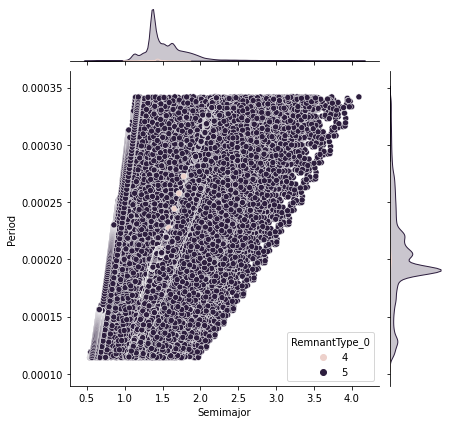

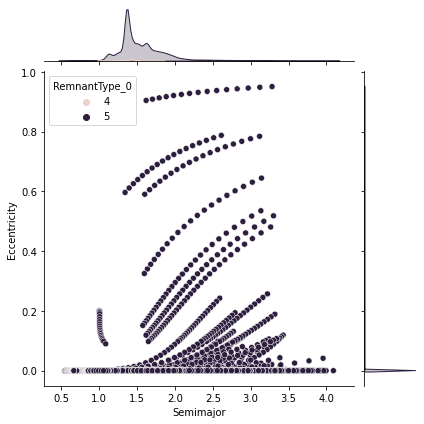

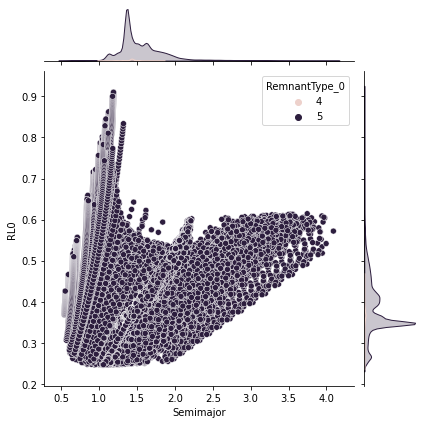

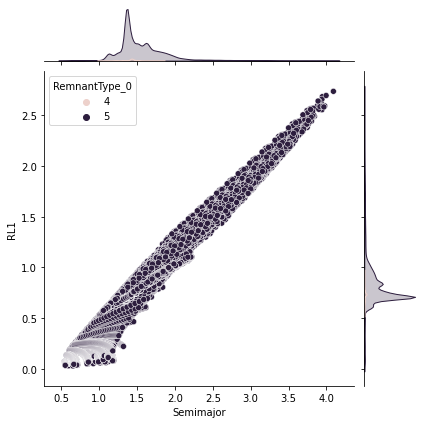

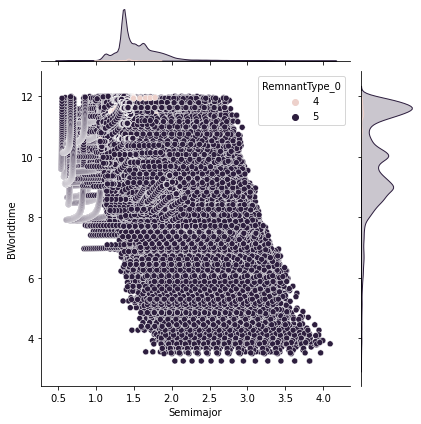

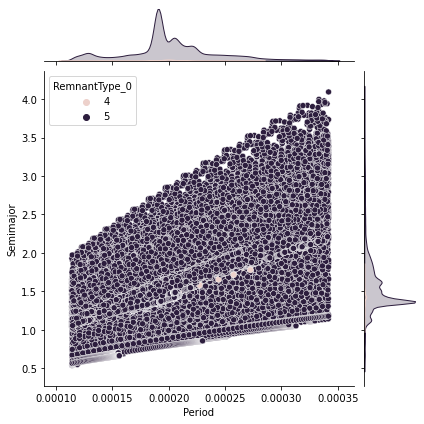

C:\Users\Utente\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


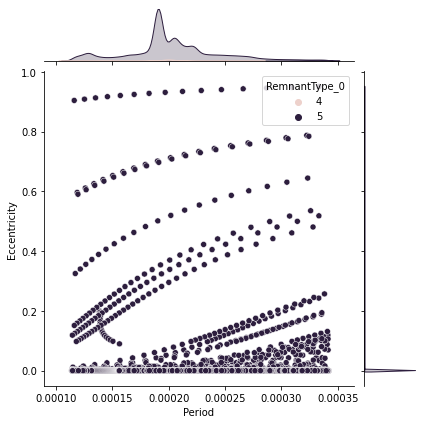

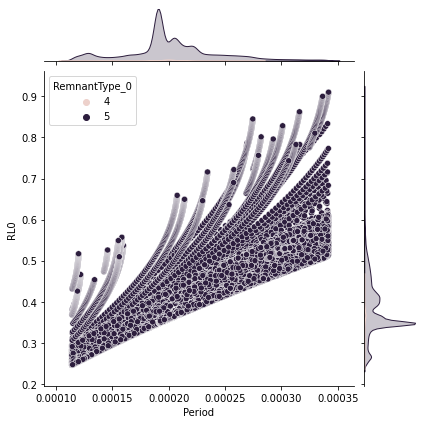

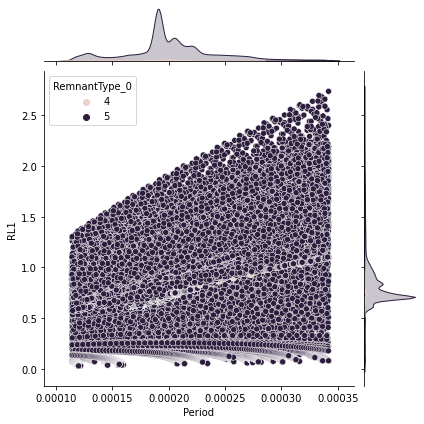

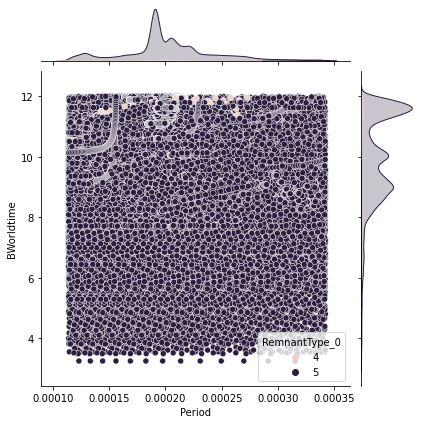

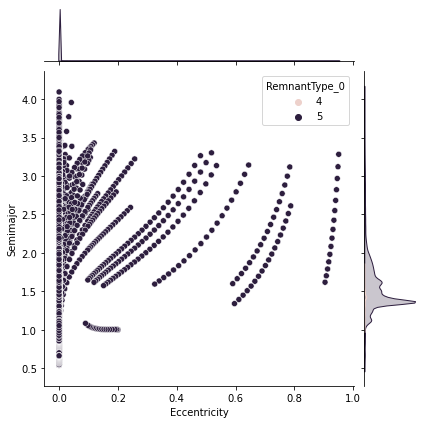

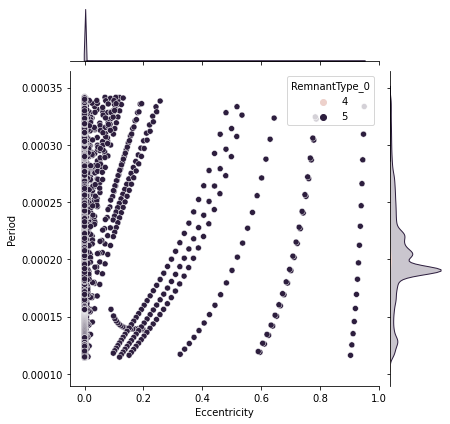

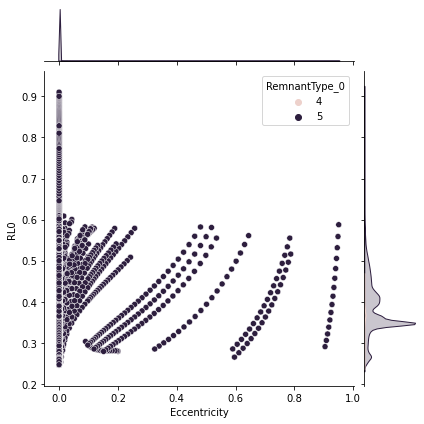

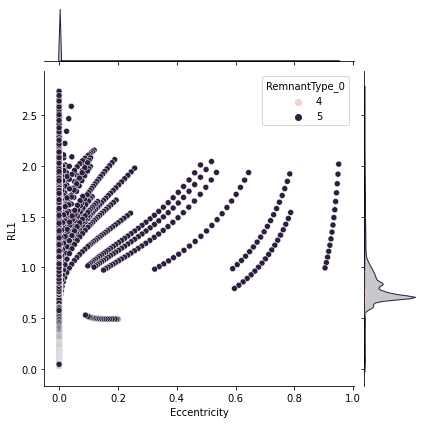

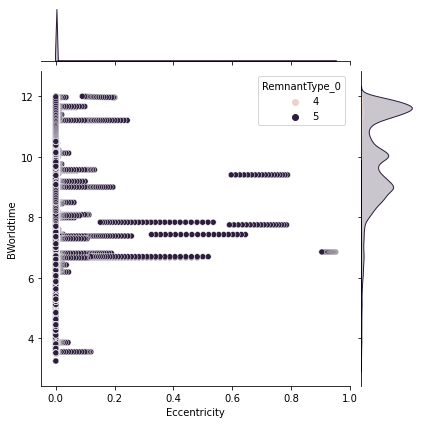

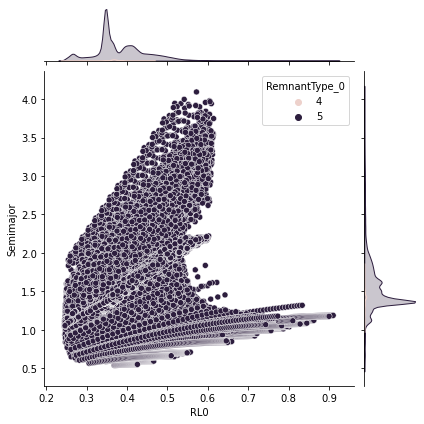

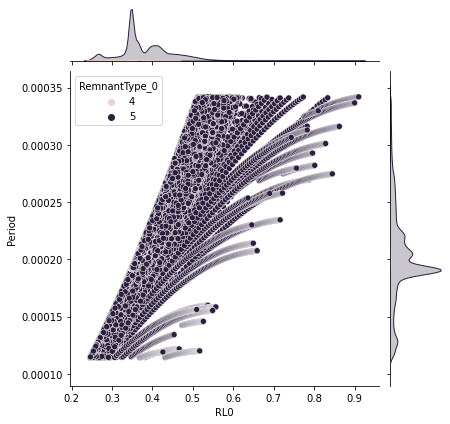

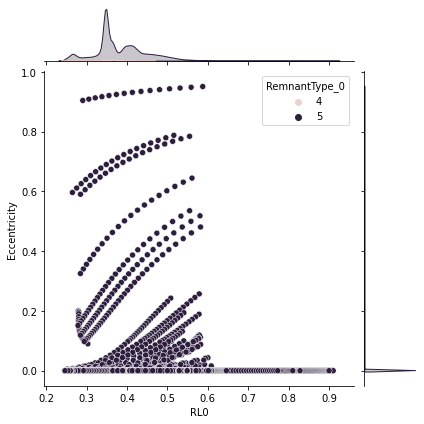

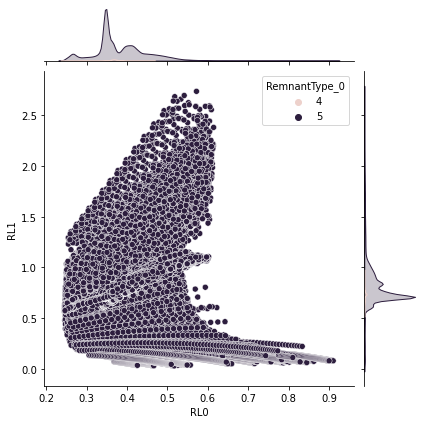

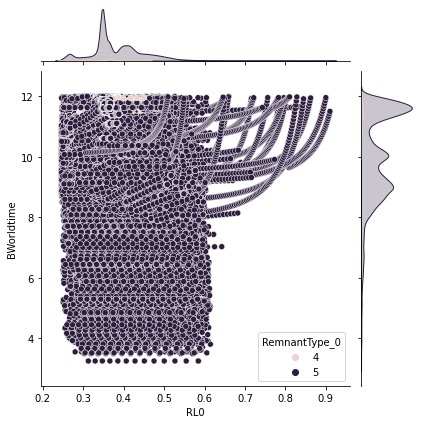

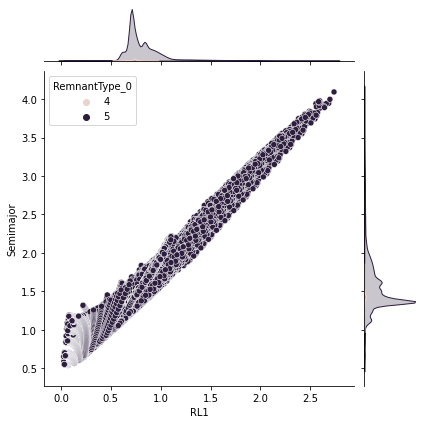

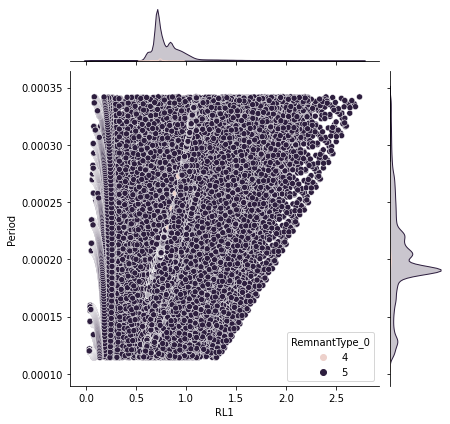

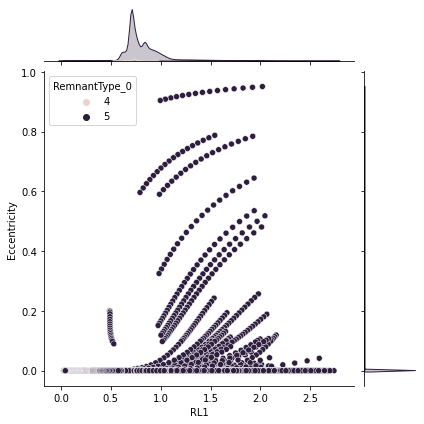

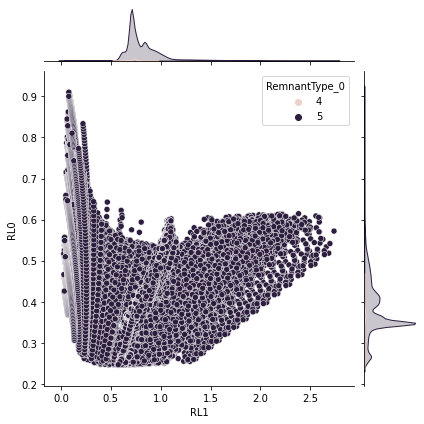

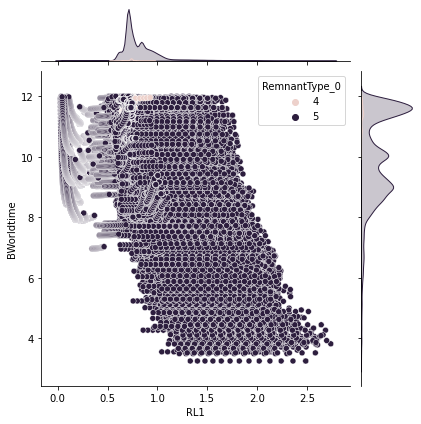

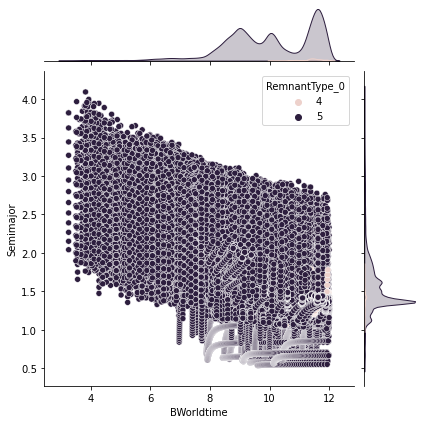

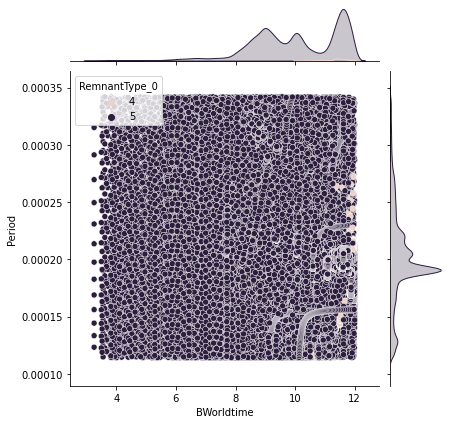

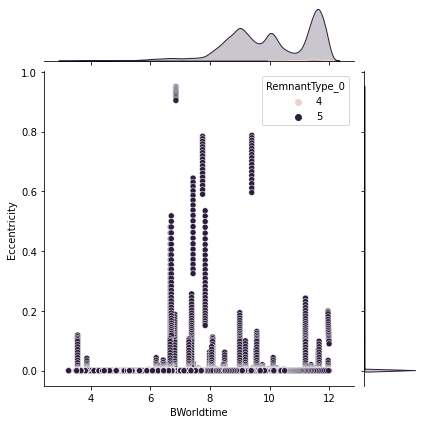

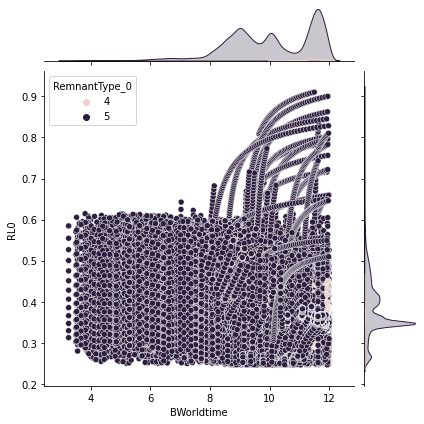

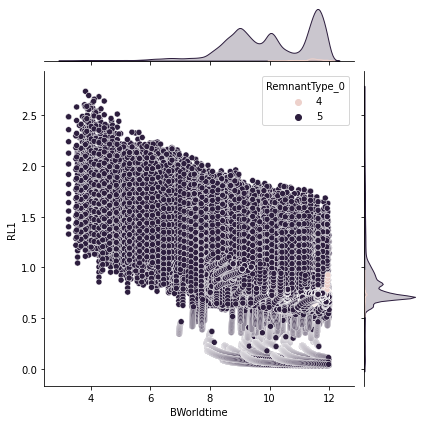

In [29]:
data = [
 'Mass_0',
 'MHE_0',
 'MCO_0',
 'Radius_0',
 'RHE_0',
 'RCO_0',
 'Luminosity_0',
 'Temperature_0',
 'Lambda_0',
 'Qconv_0',
 'Depthconv_0',
 'Phase_0',
 'RemnantType_0',
 'Zams_0',
 'Mass_1',
 'MHE_1',
 'MCO_1',
 'Radius_1',
 'RHE_1',
 'RCO_1',
 'Luminosity_1',
 'Temperature_1',
 'Lambda_1',
 'Qconv_1',
 'Depthconv_1',
 'Phase_1',
 'RemnantType_1',
 'Zams_1',
 'Semimajor',
 'Period',
 'Eccentricity',
 'RL0',
 'RL1',
 'BWorldtime',
 ]
#here you can loop plot all data array, beware to do on vm are you are going to run out of memory
sns.color_palette("vlag", as_cmap=True)

for i in ['Semimajor', 'Period', 'Eccentricity','RL0','RL1','BWorldtime']:
    for j in ['Semimajor', 'Period', 'Eccentricity','RL0','RL1','BWorldtime']:
        if i != j:
                #sns.scatterplot(data=df, x=i, y=j, hue="ID").set(title= j + "vs" + i)
                sns.jointplot(data=df, x=i, y=j, hue="RemnantType_0")
        else:
            continue
            

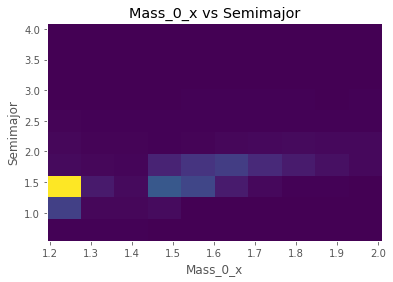

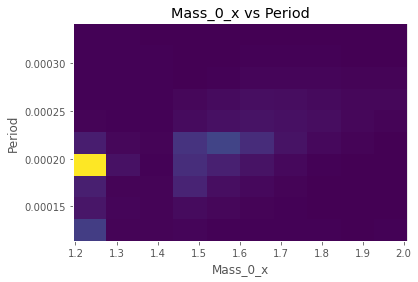

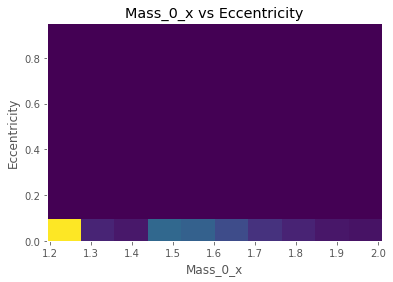

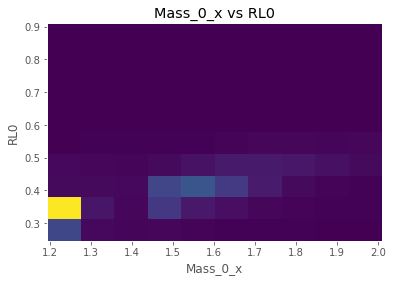

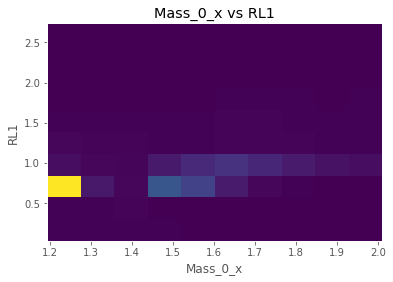

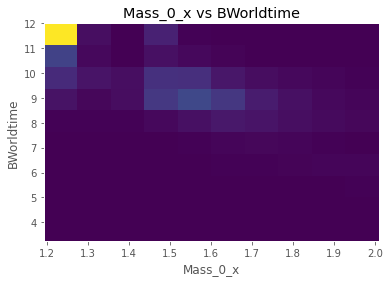

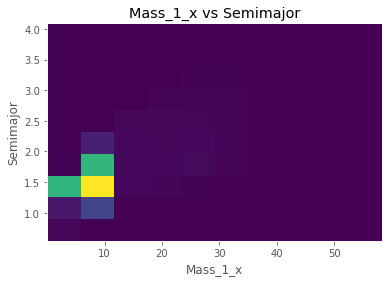

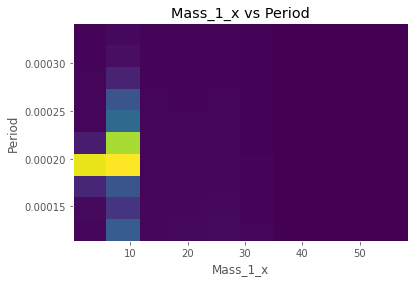

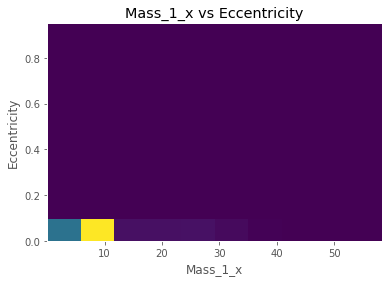

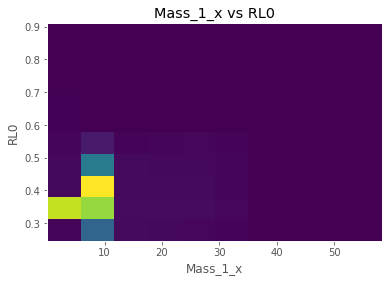

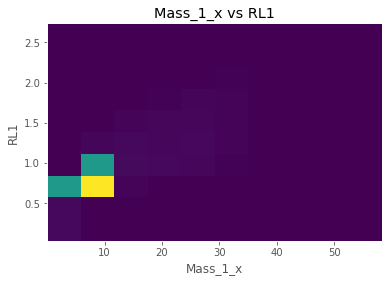

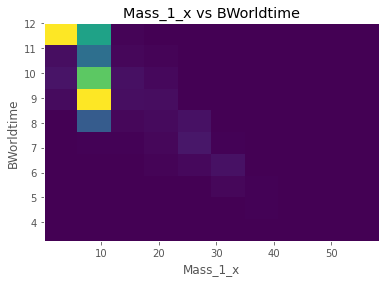

In [77]:
for i in ["Mass_0_x","Mass_1_x"]:
    for j in ['Semimajor', 'Period', 'Eccentricity','RL0','RL1','BWorldtime']:
        if i != j:
                _i_ = df_3[i].to_numpy()
                _j_ = df_3[j].to_numpy()
                plt.hist2d(_i_, _j_)
                #plt.legend(prop={'size': 12})
                plt.title(i+" vs "+j)
                plt.xlabel(i)
                plt.ylabel(j)
                plt.show()
                #sns.scatterplot(data=df, x=i, y=j, hue="ID").set(title= j + "vs" + i)
                #sns.jointplot(data=df, x=i, y=j, hue="RemnantType_0")
        else:
            continue

In [ ]:
for i in ["Mass_0_y","Mass_1_y"]:
    for j in ['Semimajor', 'Period', 'Eccentricity','RL0','RL1','BWorldtime']:
        _i_ = df_3un[i].to_numpy()
        _j_ = df_3un[j].to_numpy()
        _i_ = _i_[np.logical_not(np.isnan(_i_))]
        _j_ = _j_[np.logical_not(np.isnan(_j_))]
        if (np.isnan(_i_).any()):
            continue
        else:
            plt.hist2d(_i_, _j_)
            #plt.legend(prop={'size': 12})
            plt.title(i+" vs "+j)
            plt.xlabel(i)
            plt.ylabel(j)
            plt.show()
            #sns.scatterplot(data=df, x=i, y=j, hue="ID").set(title= j + "vs" + i)
            #sns.jointplot(data=df, x=i, y=j, hue="RemnantType_0")
            
#there are NAN values in the evolved dataset why???? tried to remove them, but they are in different rows

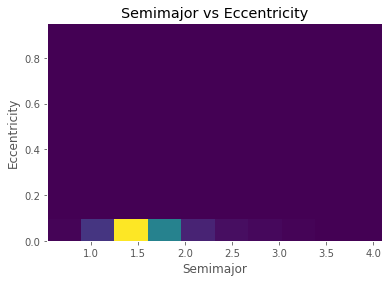

In [89]:
for i in ['Semimajor']:
    for j in ['Eccentricity']:
        if i != j:
                _i_ = df_3[i].to_numpy()
                _j_ = df_3[j].to_numpy()
                plt.hist2d(_i_, _j_)
                #plt.legend(prop={'size': 12})
                plt.title(i+" vs "+j)
                plt.xlabel(i)
                plt.ylabel(j)
                plt.show()
                #sns.scatterplot(data=df, x=i, y=j, hue="ID").set(title= j + "vs" + i)
                #sns.jointplot(data=df, x=i, y=j, hue="RemnantType_0")
        else:
            continue

No handles with labels found to put in legend.


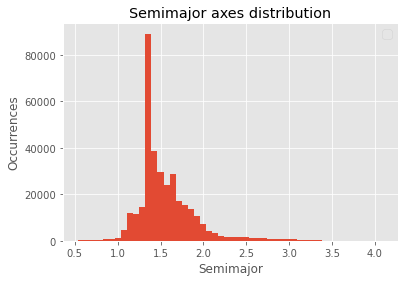

No handles with labels found to put in legend.


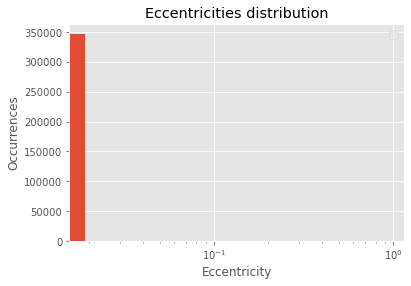

In [102]:
#convert column in array
semimajor = df_3['Semimajor'].to_numpy()
eccentricity = df_3['Eccentricity'].to_numpy()

plt.hist(semimajor,bins=50)
# Plot formatting
plt.legend(prop={'size': 12})
plt.title("Semimajor axes distribution")
plt.xlabel("Semimajor")
plt.ylabel("Occurrences")
plt.show()

plt.hist(eccentricity,bins=50)
# Plot formatting
plt.legend(prop={'size': 12})
plt.title("Eccentricities distribution")
plt.xlabel("Eccentricity")
plt.ylabel("Occurrences")
plt.xscale('log')
plt.show()

No handles with labels found to put in legend.


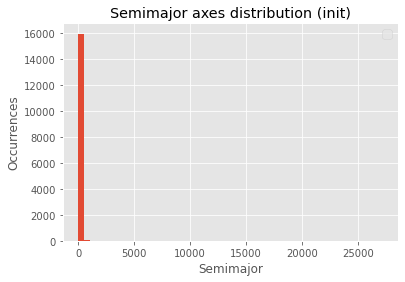

No handles with labels found to put in legend.


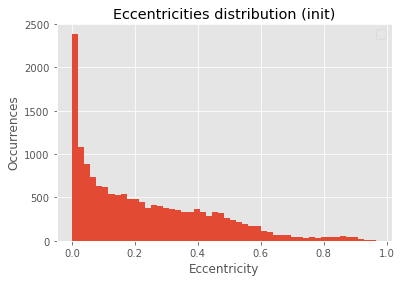

In [101]:
#convert column in array
a = df_3un['a'].to_numpy()
e = df_3un['e'].to_numpy()
a = a[np.logical_not(np.isnan(a))]
e = e[np.logical_not(np.isnan(e))]

plt.hist(a,bins=50)
# Plot formatting
plt.legend(prop={'size': 12})
plt.title("Semimajor axes distribution (init)")
plt.xlabel("Semimajor")
plt.ylabel("Occurrences")
plt.show()

plt.hist(e,bins=50)
# Plot formatting
plt.legend(prop={'size': 12})
plt.title("Eccentricities distribution (init)")
plt.xlabel("Eccentricity")
plt.ylabel("Occurrences")
plt.show()